# **Experiment - 4**

# **Deep Learning Training and Architecture, Feature Extraction, Models training with some pretrained models.**

‎
‎
‎
‎
‎
‎
‎ ‎
‎

‎











#**Importing Necessary libraries**

* From keras library we are going to use image preprocessing task, to normalize the image pixel values in between 0 to 1.
* Model is imported to load variuos Neural Netwrok models such as Sequential.
* We are going to use transfer learning technique.

In [ ]:
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras import applications
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

#**Loading the Training and Testing Data and Defining the Basic Parameters**
* We are resizing the input image to 128 * 128

* In the dataset :
    Training Set : 70%
    Validation Set : 20%
    Test Set : 10%

In [ ]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255) # vertical_flip=True,
                                                   # horizontal_flip=True,
                                                   # height_shift_range=0.1,
                                                   # width_shift_range=0.1
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        '/workspace/Bootcamp/Data/plant_village/train/',
        target_size=(128, 128),
        batch_size=16,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        '/workspace/Bootcamp/Data/plant_village/val/',
        target_size=(128, 128),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        '/workspace/Bootcamp/Data/plant_village/test/',
        target_size=(128, 128),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)


Found 3004 images belonging to 4 classes.
Found 635 images belonging to 4 classes.
Found 547 images belonging to 4 classes.


# **Visualization of Few Images**

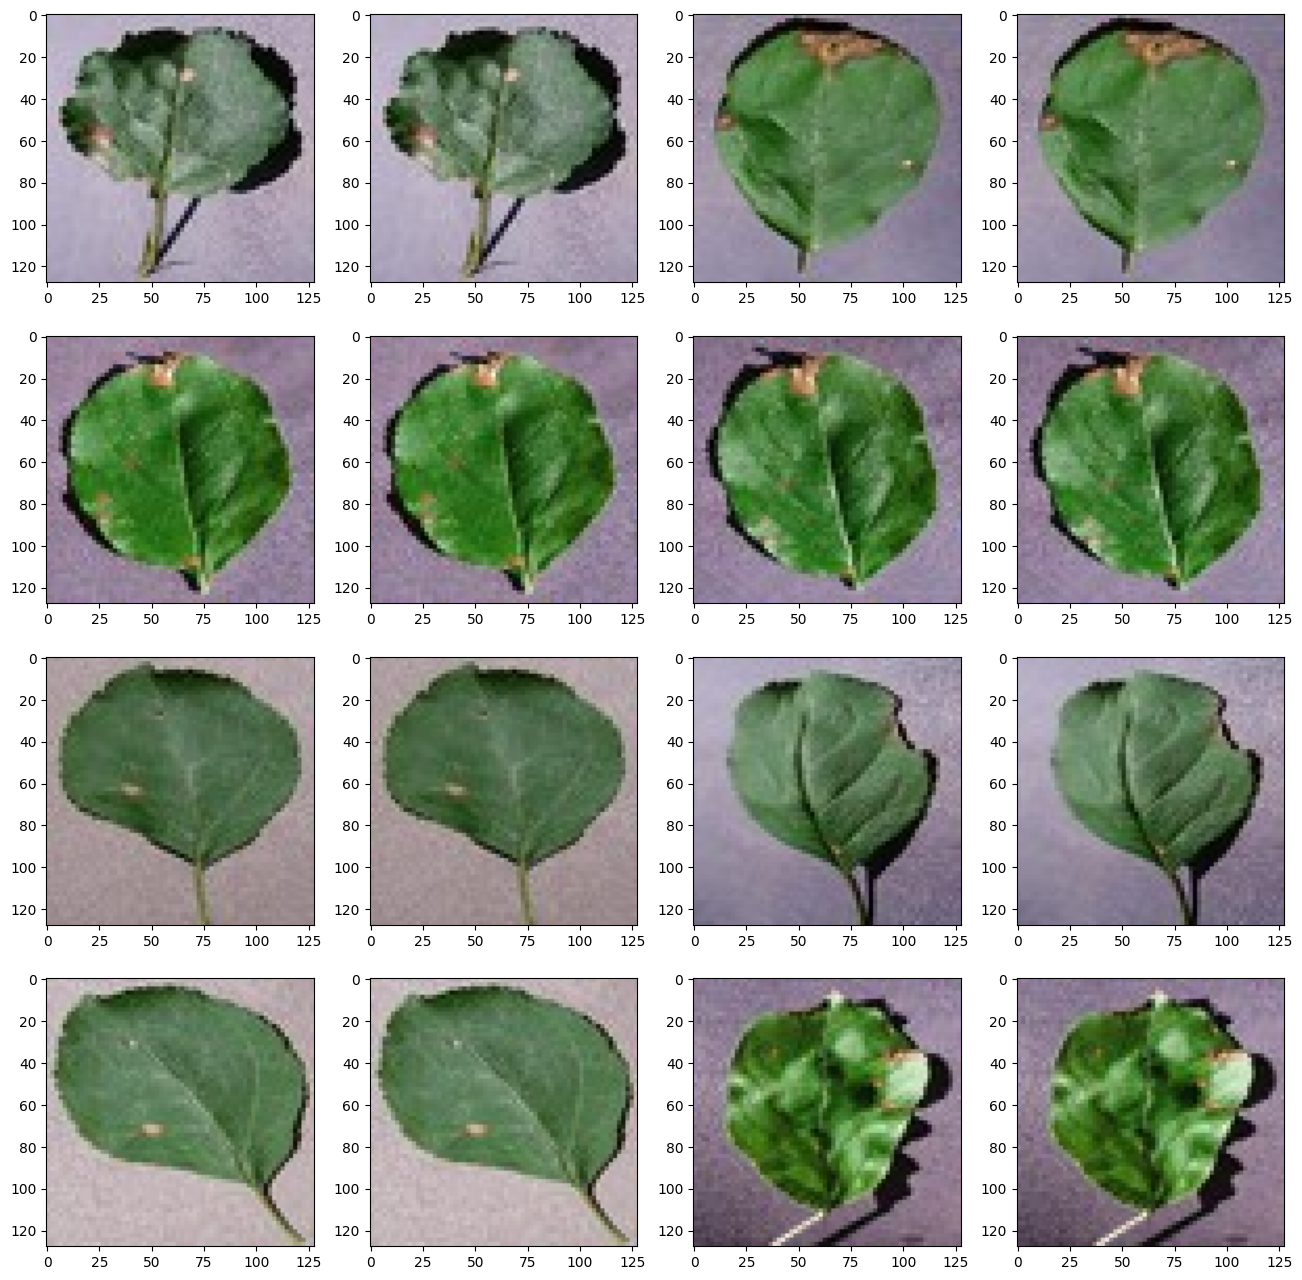

In [ ]:
plt.figure(figsize=(16, 16))
for i in range(1, 17):
  plt.subplot(4, 4, i)
  img, label = test_generator.next()
  # print(img.shape)
  # print(label)
  plt.imshow(img[0])
plt.show()

In [ ]:
img, label = test_generator.next()
img[0].shape

(128, 128, 3)

#**What is ImageNet?**
ImageNet is formally a project aimed at (manually) labeling and categorizing images into almost 22,000 separate object categories for the purpose of computer vision research.

However, when we hear the term “ImageNet” in the context of deep learning and Convolutional Neural Networks, we are likely referring to the ImageNet Large Scale Visual Recognition Challenge, or ILSVRC for short.

The goal of this image classification challenge is to train a model that can correctly classify an input image into 1,000 separate object categories.

Models are trained on ~1.2 million training images with another 50,000 images for validation and 100,000 images for testing.

# **Exploring Keras Applications for Transfer Learning**

## **VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
# Include_top = False means excluding the model fully connected layers
base_model.trainable = False ## Not trainable weights,
#weights of the VGG16 model will not be updated during training
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

# **Adding top layers according to number of classes in our data**

In [ ]:
flatten_layer = layers.GlobalAveragePooling2D()
# dense_layer_1 = layers.Dense(64, activation='relu')
# dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 2052      
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


# **Training**

In [ ]:
# sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(optimizer = Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30
188/187 [==============================] - 6s 34ms/step - loss: 0.1190 - acc: 0.9707 - val_loss: 0.1386 - val_acc: 0.9559
Epoch 2/30
188/187 [==============================] - 6s 32ms/step - loss: 0.1184 - acc: 0.9704 - val_loss: 0.1364 - val_acc: 0.9559
Epoch 3/30
188/187 [==============================] - 6s 32ms/step - loss: 0.1180 - acc: 0.9714 - val_loss: 0.1360 - val_acc: 0.9559
Epoch 4/30
188/187 [==============================] - 6s 32ms/step - loss: 0.1175 - acc: 0.9704 - val_loss: 0.1361 - val_acc: 0.9559
Epoch 5/30
188/187 [==============================] - 6s 32ms/step - loss: 0.1172 - acc: 0.9690 - val_loss: 0.1367 - val_acc: 0.9575
Epoch 6/30
188/187 [==============================] - 6s 32ms/step - loss: 0.1169 - acc: 0.9704 - val_loss: 0.1355 - val_acc: 0.9575
Epoch 7/30
188/187 [==============================] - 6s 32ms/step - loss: 0.1164 - acc: 0.9704 - val_loss: 0.1348 - val_acc: 0.9559
Epoch 8/30
188/187 [==============================] - 6s 32ms/step - 

# **Saving the model**

In [ ]:
model.save("VGG16_plant_deseas.h5")
print("Saved model to disk")

Saved model to disk


# **Loading the model**

In [ ]:
model = models.load_model('VGG16_plant_deseas.h5')
print("Model is loaded")

Model is loaded


# **Saving the Weights**

In [ ]:
model.save_weights('cnn_classification.h5')

# **Loading the weights**

In [ ]:
model.load_weights('cnn_classification.h5')

# **Visualization of training over epoch**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

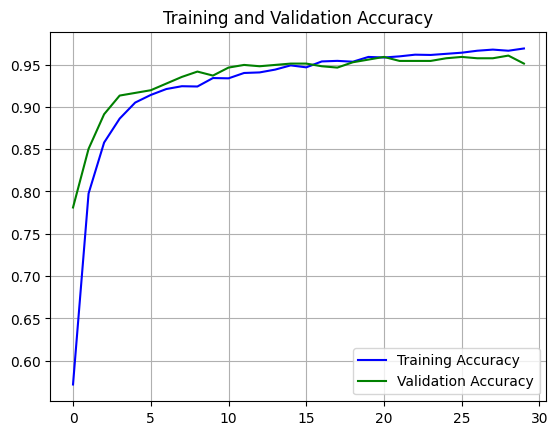

<Figure size 640x480 with 0 Axes>

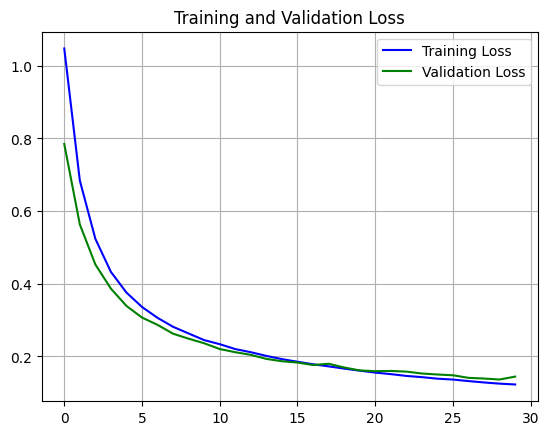

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

# **Performance measure**

In [ ]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


547/547 [==============================] - 3s 6ms/step
No of errors = 33/547


In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

93.96709323583181

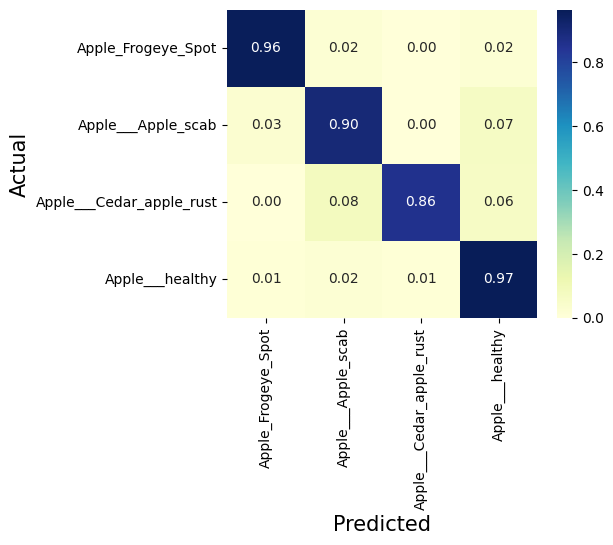

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                          precision    recall  f1-score   support

      Apple_Frogeye_Spot       0.94      0.96      0.95       104
      Apple___Apple_scab       0.92      0.90      0.91       134
Apple___Cedar_apple_rust       0.95      0.86      0.90        49
         Apple___healthy       0.95      0.97      0.96       260

                accuracy                           0.94       547
               macro avg       0.94      0.92      0.93       547
            weighted avg       0.94      0.94      0.94       547



# **InceptionNet**

In [ ]:

from tensorflow.keras import applications

## Loading InceptionV3 model
base_model = applications.InceptionV3(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
base_model.trainable = False ## Not trainable weights

base_model.summary()

87916544/87910968 [==============================] - 15s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
_____________________

In [ ]:
flatten_layer = layers.GlobalAveragePooling2D()
dense_layer_1 = layers.Dense(64, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                131136    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
Total params: 21,936,132
Trainable params: 133,348
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=2)

Epoch 1/10
Epoch 1/10
188/187 - 9s - loss: 0.3544 - acc: 0.8725 - val_loss: 1.8910 - val_acc: 0.7134
Epoch 2/10
Epoch 1/10
188/187 - 5s - loss: 0.4988 - acc: 0.8113 - val_loss: 1.5254 - val_acc: 0.7181
Epoch 3/10
Epoch 1/10
188/187 - 5s - loss: 0.4549 - acc: 0.8246 - val_loss: 1.2376 - val_acc: 0.7433
Epoch 4/10
Epoch 1/10
188/187 - 5s - loss: 0.4242 - acc: 0.8342 - val_loss: 1.2466 - val_acc: 0.7780
Epoch 5/10
Epoch 1/10
188/187 - 5s - loss: 0.4462 - acc: 0.8382 - val_loss: 1.6309 - val_acc: 0.7165
Epoch 6/10
Epoch 1/10
188/187 - 5s - loss: 0.4180 - acc: 0.8445 - val_loss: 1.3079 - val_acc: 0.7260
Epoch 7/10
Epoch 1/10
188/187 - 5s - loss: 0.4094 - acc: 0.8442 - val_loss: 2.0786 - val_acc: 0.6693
Epoch 8/10
Epoch 1/10
188/187 - 5s - loss: 0.3816 - acc: 0.8595 - val_loss: 1.5253 - val_acc: 0.7606
Epoch 9/10
Epoch 1/10
188/187 - 5s - loss: 0.4081 - acc: 0.8449 - val_loss: 1.1693 - val_acc: 0.7606
Epoch 10/10
Epoch 1/10
188/187 - 5s - loss: 0.3675 - acc: 0.8615 - val_loss: 1.4619 - val_a

In [ ]:
model.save("InceptionNet_plant_deseas.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

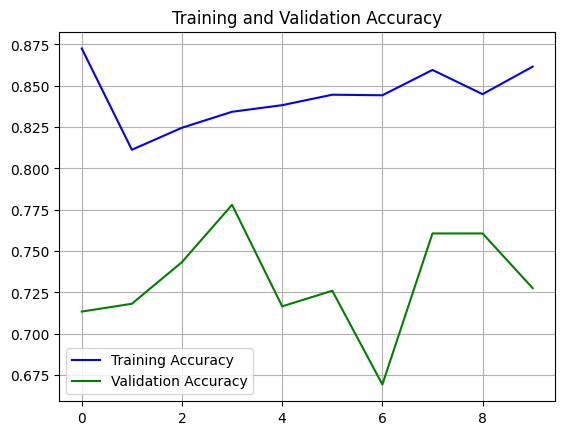

<Figure size 640x480 with 0 Axes>

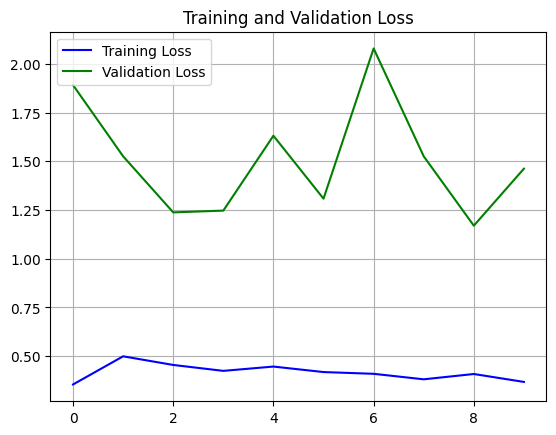

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


547/547 [==============================] - 9s 17ms/step
No of errors = 153/547


In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

72.0292504570384

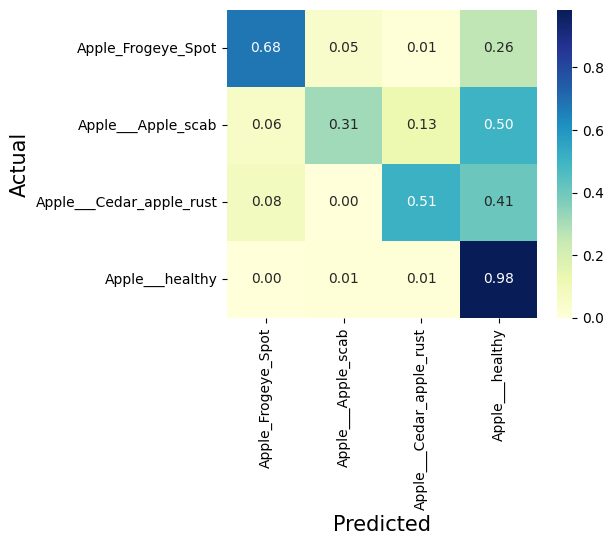

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                          precision    recall  f1-score   support

      Apple_Frogeye_Spot       0.86      0.68      0.76       104
      Apple___Apple_scab       0.86      0.31      0.46       134
Apple___Cedar_apple_rust       0.56      0.51      0.53        49
         Apple___healthy       0.69      0.98      0.81       260

                accuracy                           0.72       547
               macro avg       0.74      0.62      0.64       547
            weighted avg       0.75      0.72      0.69       547



#**ResNet**

In [ ]:
from keras import applications

## Loading VGG16 model
base_model = applications.ResNet50(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
base_model.trainable = False ## Not trainable weights

base_model.summary()

In [ ]:
flatten_layer = layers.GlobalAveragePooling2D()
# dense_layer_1 = layers.Dense(63, activation='relu')
# dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    # dense_layer_1,
    # dense_layer_2,
    prediction_layer
])

model.summary()

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

In [ ]:
model.save("ResNet_plant_deseas.h5")
print("Saved model to disk")

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))